In [34]:
import yfinance as yf
import pandas as pd

# Configuração
ativos = ['BTC-USD', 'ETH-USD', 'SOL-USD']
intervalo = '1d'
periodo = '2y'

# Adicione este parâmetro para forçar dados reais
dados = yf.download(
    tickers=ativos,
    interval=intervalo,
    period=periodo,
    progress=False,
    group_by='ticker',
    ignore_tz=True  # ← Corrige problemas de fuso horário
)

# Salvar e mostrar
dados_clean.to_csv('../data/crypto_prices.csv')
print("✅ Dados salvos em data/crypto_prices.csv")
print(dados_clean.tail(3))

✅ Dados salvos em data/crypto_prices.csv
                  BTC-USD      ETH-USD     SOL-USD
Date                                              
2025-05-26  109440.367188  2564.138428  174.907898
2025-05-27  108994.640625  2663.069824  176.815186
2025-05-28  107475.007812  2640.451660  170.082748


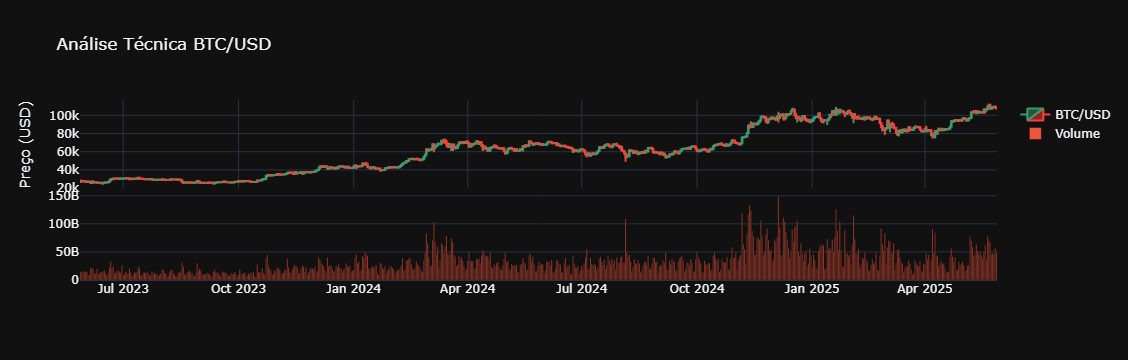

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criar figura com subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# Gráfico de preços
fig.add_trace(go.Candlestick(
    x=dados.index,
    open=dados['BTC-USD']['Open'],
    high=dados['BTC-USD']['High'],
    low=dados['BTC-USD']['Low'],
    close=dados['BTC-USD']['Close'],
    name='BTC/USD'
), row=1, col=1)

# Gráfico de volume
fig.add_trace(go.Bar(
    x=dados.index,
    y=dados['BTC-USD']['Volume'],
    name='Volume'
), row=2, col=1)

# Layout
fig.update_layout(
    title='Análise Técnica BTC/USD',
    yaxis_title='Preço (USD)',
    xaxis_rangeslider_visible=False,
    template='plotly_dark'
)

fig.show()